# EXPLATORY DATA ANALYSIS

## Data Loading, Description and Cleanup

In [ ]:
!pip install maidenhead pandas matplotlib numpy cartopy seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import maidenhead as mh
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [27]:
header = pd.read_pickle("../Data/Pre-Processed/header.pickle")

In [28]:
logs = pd.read_pickle("../Data/Pre-Processed/logs.pickle")

Lets have look at what header looks like

In [29]:
header.head()

,START-OF-LOG,CONTEST,CALLSIGN,LOCATION,CATEGORY-OPERATOR,CATEGORY-ASSISTED,CATEGORY-BAND,CATEGORY-POWER,CATEGORY-MODE,CATEGORY-TRANSMITTER,CATEGORY-STATION,CATEGORY-OVERLAY,GRID-LOCATOR,CLAIMED-SCORE,CREATED-BY,CATEGORY-TIME,OFFTIME
0,3.0,CQ-WW-CW,2E0CVN,DX,SINGLE-OP,NON-ASSISTED,ALL,LOW,CW,ONE,FIXED,NaN,IO80EM,626297,N1MM Logger+ 1.0.10530.0,NaN,NaN
1,3.0,CQ-WW-CW,2E0EBM,DX,SINGLE-OP,ASSISTED,ALL,LOW,CW,ONE,FIXED,NaN,JO01FQ,6837,N1MM Logger+ 1.0.10535.0,NaN,NaN
2,3.0,CQ-WW-CW,2E0FFT,DX,SINGLE-OP,NON-ASSISTED,ALL,QRP,CW,ONE,FIXED,NaN,JO01OC,1530,N1MM Logger+ 1.0.10530.0,NaN,NaN
3,3.0,CQ-WW-CW,2E0JID,DX,SINGLE-OP,ASSISTED,40M,LOW,CW,ONE,FIXED,NaN,IO81VV,1680,N1MM Logger+ 1.0.10525.0,NaN,NaN
4,3.0,CQ-WW-CW,2E0JLZ,DX,SINGLE-OP,ASSISTED,ALL,LOW,CW,ONE,FIXED,ROOKIE,IO81VV,155208,N1MM Logger+ 1.0.10530.0,NaN,NaN


In [4]:
header_summary = header.describe(include='all')
print(header_summary)

       START-OF-LOG   CONTEST CALLSIGN LOCATION CATEGORY-OPERATOR  \
count          7961      7961     7961     7961              7961   
unique            1         1     7961       84                 2   
top             3.0  CQ-WW-CW     ZX9X       DX         SINGLE-OP   
freq           7961      7961        1     5823              7662   
mean            NaN       NaN      NaN      NaN               NaN   
std             NaN       NaN      NaN      NaN               NaN   
min             NaN       NaN      NaN      NaN               NaN   
25%             NaN       NaN      NaN      NaN               NaN   
50%             NaN       NaN      NaN      NaN               NaN   
75%             NaN       NaN      NaN      NaN               NaN   
max             NaN       NaN      NaN      NaN               NaN   

       CATEGORY-ASSISTED CATEGORY-BAND CATEGORY-POWER CATEGORY-MODE  \
count               7961          7961           7961          7961   
unique                 3     

Log looks like - 

In [77]:
logs.head()

,freq,mo,date,time,sent_call,sent_rst,sent_exch,rcvd_call,rcvd_rst,rcvd_exch,t
0,7056,CW,2024-11-23,0000,2E0CVN,599,14,HA1AG,599,15,NaN
1,7054,CW,2024-11-23,0001,2E0CVN,599,14,OM0WR,599,15,NaN
2,7050,CW,2024-11-23,0002,2E0CVN,599,14,VY2TT,599,05,NaN
3,7046,CW,2024-11-23,0003,2E0CVN,599,14,S56M,599,15,NaN
4,7046,CW,2024-11-23,0004,2E0CVN,599,14,DM4X,599,14,NaN


In [12]:
def count_QSO_logs(callsign):
    """
    Count the number of QSO logs for a given callsign.
    """
    return logs[logs['sent_call'] == callsign].shape[0]

print(count_QSO_logs(header['CALLSIGN'][0]))

1230


In [6]:
# Clean up log data

log_cols_to_upper = ['sent_call', 'rcvd_call']
for col in log_cols_to_upper:
    logs[col] = logs[col].str.upper()


I will add a column to header df that will count the QSO rows for the entry has submitted -

In [13]:
# DO NOT RUN AGAIN (after doing once) -----
count = []
for callsign in header['CALLSIGN']:
    count.append(count_QSO_logs(callsign))

header['QSO_COUNT'] = count
header_updated = header
header_updated.to_pickle("../Data/Pre-Processed/header_updated.pickle")

In [3]:
# read the updated header
header_updated = pd.read_pickle("../Data/Pre-Processed/header_updated.pickle")

Some columns have string lower, making corrections -

In [31]:
# Clean up header data

cols_to_upper = ['CATEGORY-ASSISTED','CATEGORY-POWER']
for col in cols_to_upper:
    header_updated[col] = header_updated[col].str.upper()

Operations on header data - 

In [32]:
header_columns = list(header.columns)
print("Header columns:", header_columns)

Header columns: ['START-OF-LOG', 'CONTEST', 'CALLSIGN', 'LOCATION', 'CATEGORY-OPERATOR', 'CATEGORY-ASSISTED', 'CATEGORY-BAND', 'CATEGORY-POWER', 'CATEGORY-MODE', 'CATEGORY-TRANSMITTER', 'CATEGORY-STATION', 'CATEGORY-OVERLAY', 'GRID-LOCATOR', 'CLAIMED-SCORE', 'CREATED-BY', 'CATEGORY-TIME', 'OFFTIME']


In [33]:
categories_of_interest = ['CALLSIGN', 'LOCATION', 'CATEGORY-OPERATOR', 'CATEGORY-ASSISTED', 'CATEGORY-BAND', 'CATEGORY-POWER', 'CATEGORY-TRANSMITTER', 'CATEGORY-STATION','CREATED-BY', 'GRID-LOCATOR', 'QSO_COUNT']

header_interest = header_updated[categories_of_interest]
print(header_interest.describe(include='all'))

       CALLSIGN LOCATION CATEGORY-OPERATOR CATEGORY-ASSISTED CATEGORY-BAND  \
count      7961     7961              7961              7961          7961   
unique     7961       84                 2                 2             7   
top        ZX9X       DX         SINGLE-OP          ASSISTED           ALL   
freq          1     5823              7662              4582          5566   
mean        NaN      NaN               NaN               NaN           NaN   
std         NaN      NaN               NaN               NaN           NaN   
min         NaN      NaN               NaN               NaN           NaN   
25%         NaN      NaN               NaN               NaN           NaN   
50%         NaN      NaN               NaN               NaN           NaN   
75%         NaN      NaN               NaN               NaN           NaN   
max         NaN      NaN               NaN               NaN           NaN   

       CATEGORY-POWER CATEGORY-TRANSMITTER CATEGORY-STATION  \


## Visualisations

### Participant Spread by categories

Bar Plots for categories of interest-

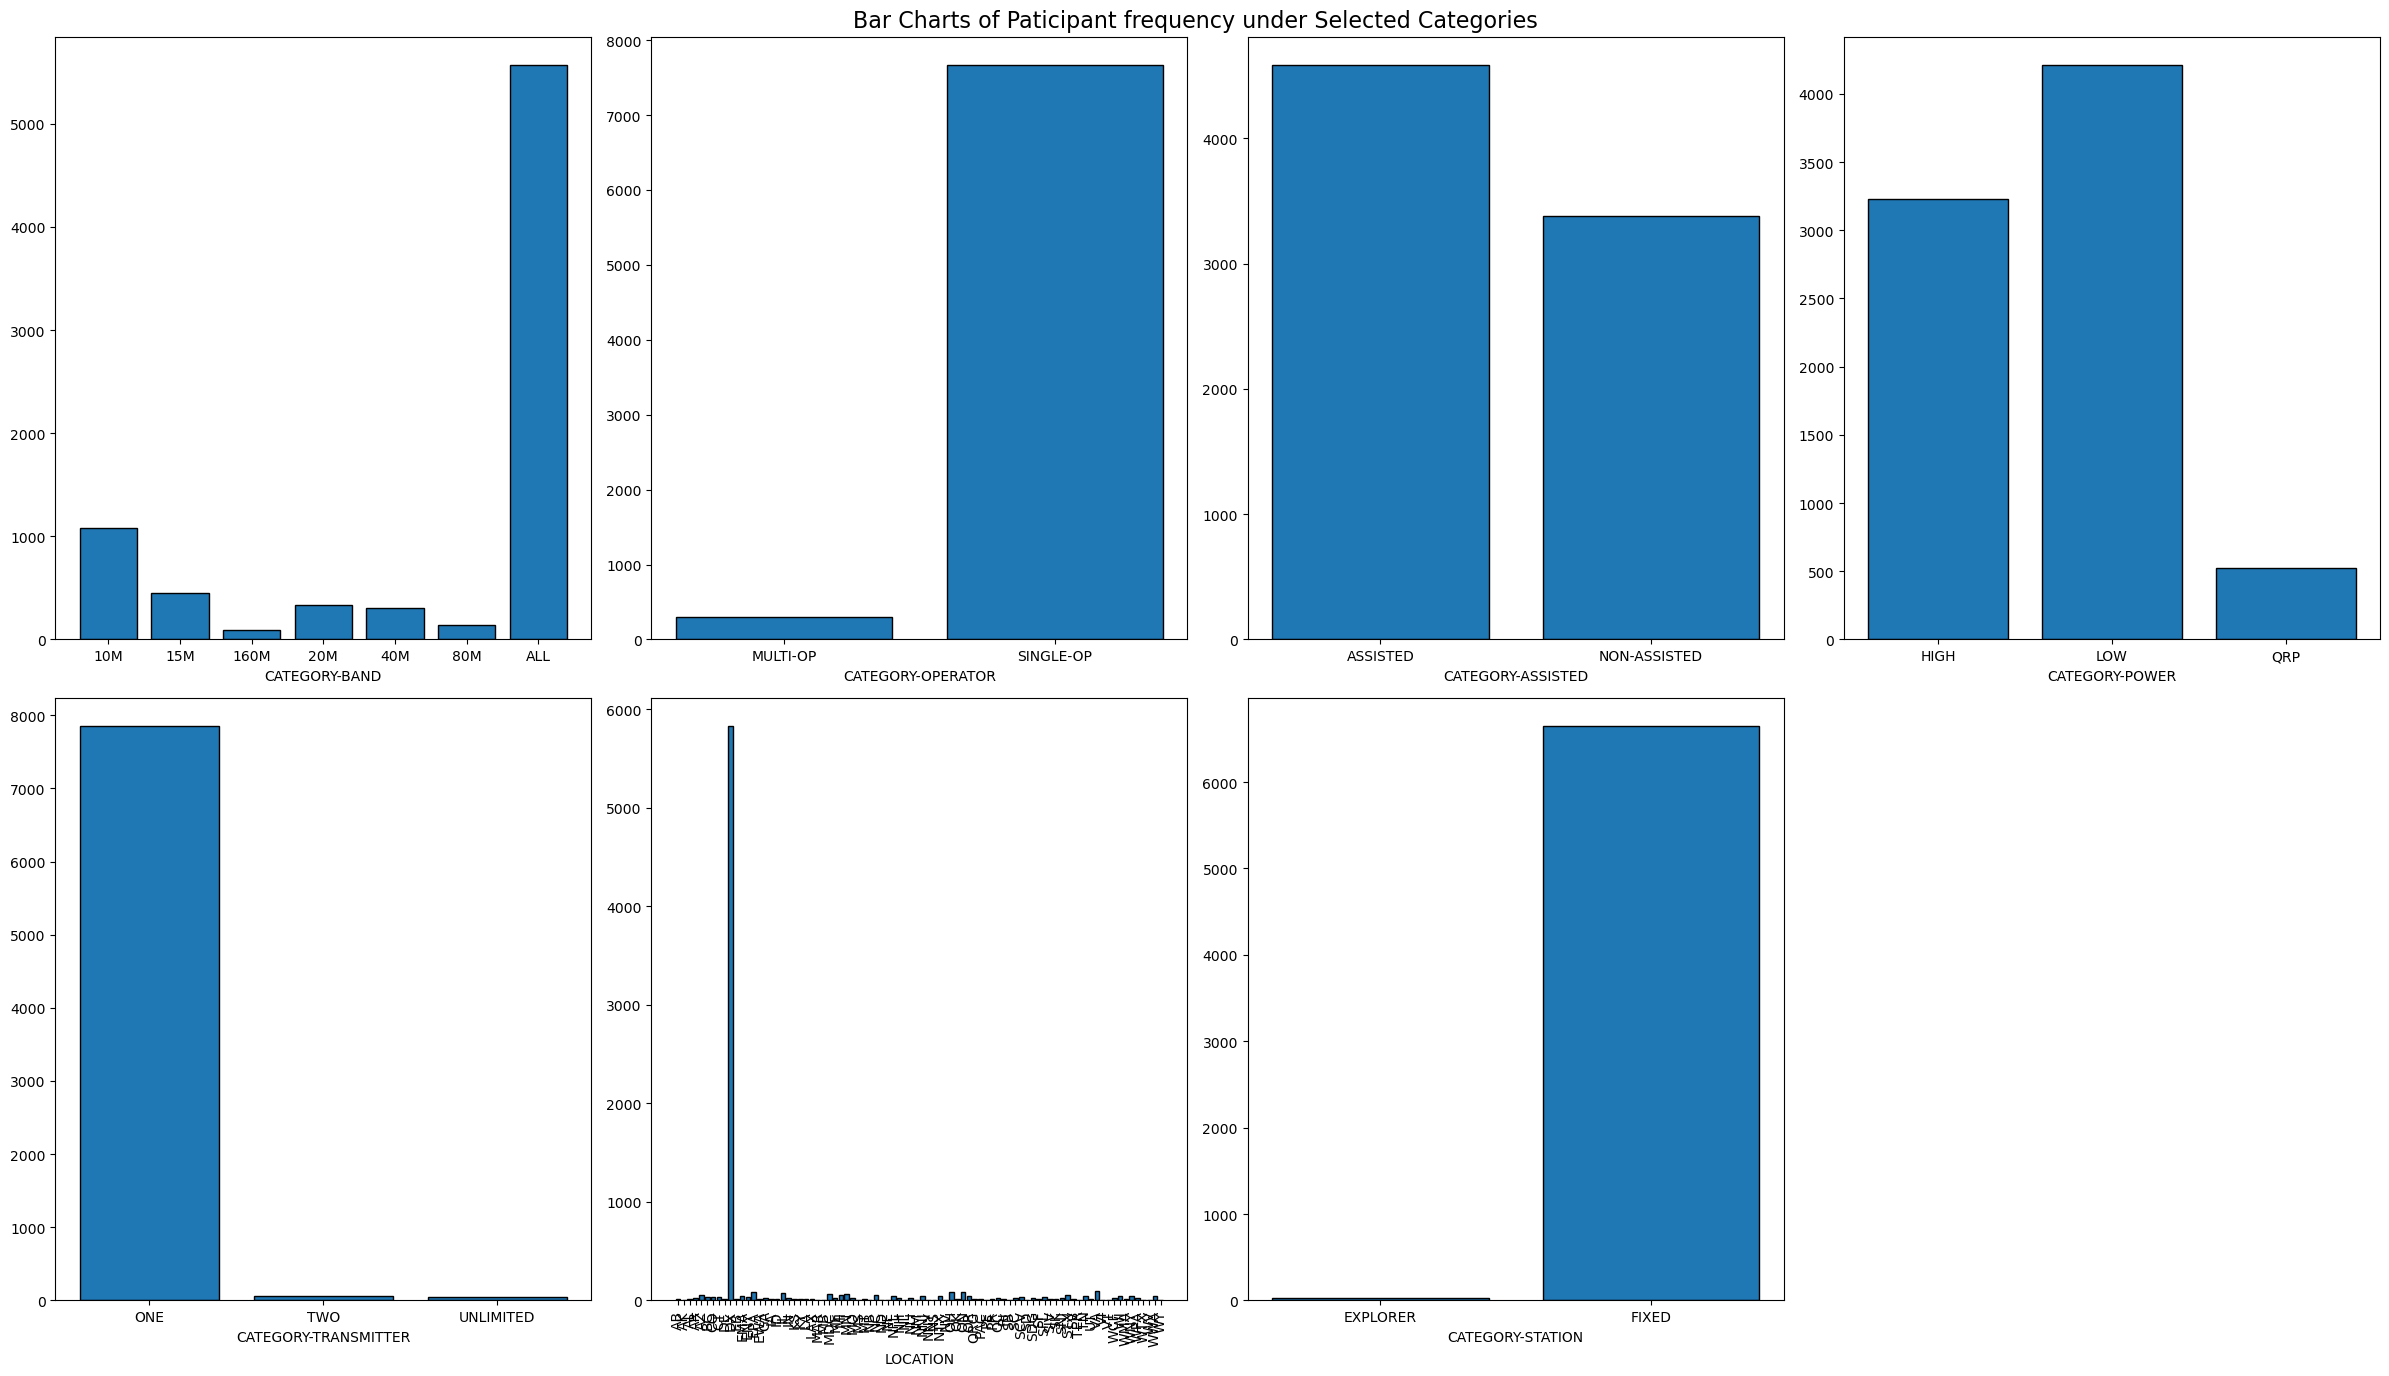

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(24, 14), sharey=False)

# Bar chart: CATEGORY-BAND
band_counts = header_interest['CATEGORY-BAND'].value_counts().sort_index()
axes[0, 0].bar(band_counts.index, band_counts.values, edgecolor='black')
axes[0, 0].set_xlabel('CATEGORY-BAND')

# Bar chart: CATEGORY-OPERATOR
operator_counts = header_interest['CATEGORY-OPERATOR'].value_counts().sort_index()
axes[0, 1].bar(operator_counts.index, operator_counts.values, edgecolor='black')
axes[0, 1].set_xlabel('CATEGORY-OPERATOR')

# Bar chart: CATEGORY-ASSISTED
assisted_counts = header_interest['CATEGORY-ASSISTED'].value_counts().sort_index()
axes[0, 2].bar(assisted_counts.index, assisted_counts.values, edgecolor='black')
axes[0, 2].set_xlabel('CATEGORY-ASSISTED')

# Bar chart: CATEGORY-POWER
power_counts = header_interest['CATEGORY-POWER'].value_counts().sort_index()
axes[0, 3].bar(power_counts.index, power_counts.values, edgecolor='black')
axes[0, 3].set_xlabel('CATEGORY-POWER')

# Bar chart: CATEGORY-TRANSMITTER
transmitter_counts = header_interest['CATEGORY-TRANSMITTER'].value_counts().sort_index()
axes[1, 0].bar(transmitter_counts.index, transmitter_counts.values, edgecolor='black')
axes[1, 0].set_xlabel('CATEGORY-TRANSMITTER')

# Bar chart: LOCATION 
location_counts = header_interest['LOCATION'].value_counts().sort_index()
axes[1, 1].bar(location_counts.index, location_counts.values, edgecolor='black')
axes[1, 1].set_xlabel('LOCATION')
axes[1, 1].tick_params(axis='x', rotation=90)

# Bar chart: CATEGORY-STATION
station_counts = header_interest['CATEGORY-STATION'].value_counts().sort_index()
axes[1, 2].bar(station_counts.index, station_counts.values, edgecolor='black')
axes[1, 2].set_xlabel('CATEGORY-STATION')

# hide unused plot
fig.delaxes(axes[1,3])

# Super title and layout
fig.suptitle('Bar Charts of Paticipant frequency under Selected Categories', fontsize=16)
plt.tight_layout()
plt.show()

### QSO count distribution - 

In [10]:
log_numbers = header_updated['QSO_COUNT']

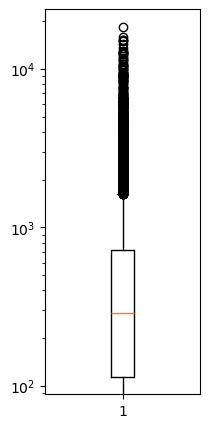

In [11]:
fig = plt.figure(figsize=(2,5))

plt.boxplot(log_numbers)
plt.yscale('log')
plt.show()

In [12]:
header_interest['QSO_COUNT'].describe()

count     7961.000000
mean       684.183268
std       1251.696530
min          0.000000
25%        114.000000
50%        289.000000
75%        718.000000
max      18446.000000
Name: QSO_COUNT, dtype: float64

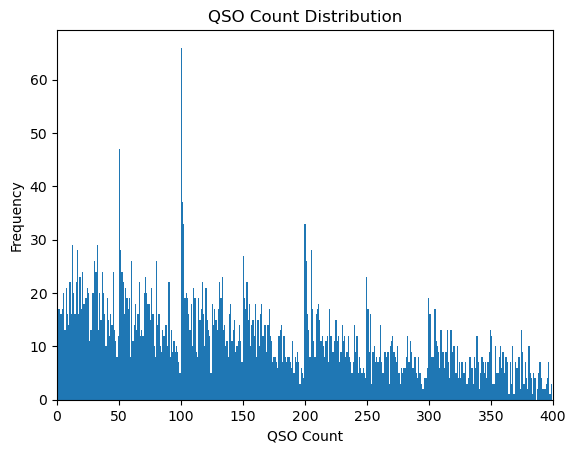

In [25]:
fig, ax = plt.subplots()

data_f = header_interest[header_interest['QSO_COUNT'] < 400]

ax.hist(data_f['QSO_COUNT'],bins= 400)
ax.set_xlim(0, 400)
ax.set_xlabel('QSO Count')
ax.set_ylabel('Frequency')
ax.set_title('QSO Count Distribution')
plt.show()

### Category - Band

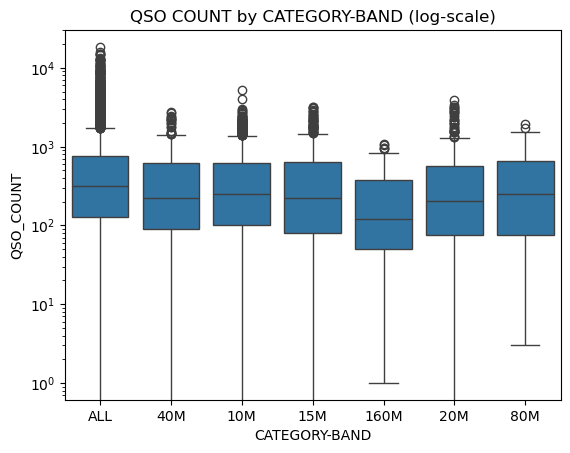

In [ ]:
#boxplot using seaborn

sns.boxplot(y= "QSO_COUNT", x= "CATEGORY-BAND", data= header_interest)
plt.yscale('log')
plt.title("QSO COUNT by CATEGORY-BAND (log-scale)")
plt.show()


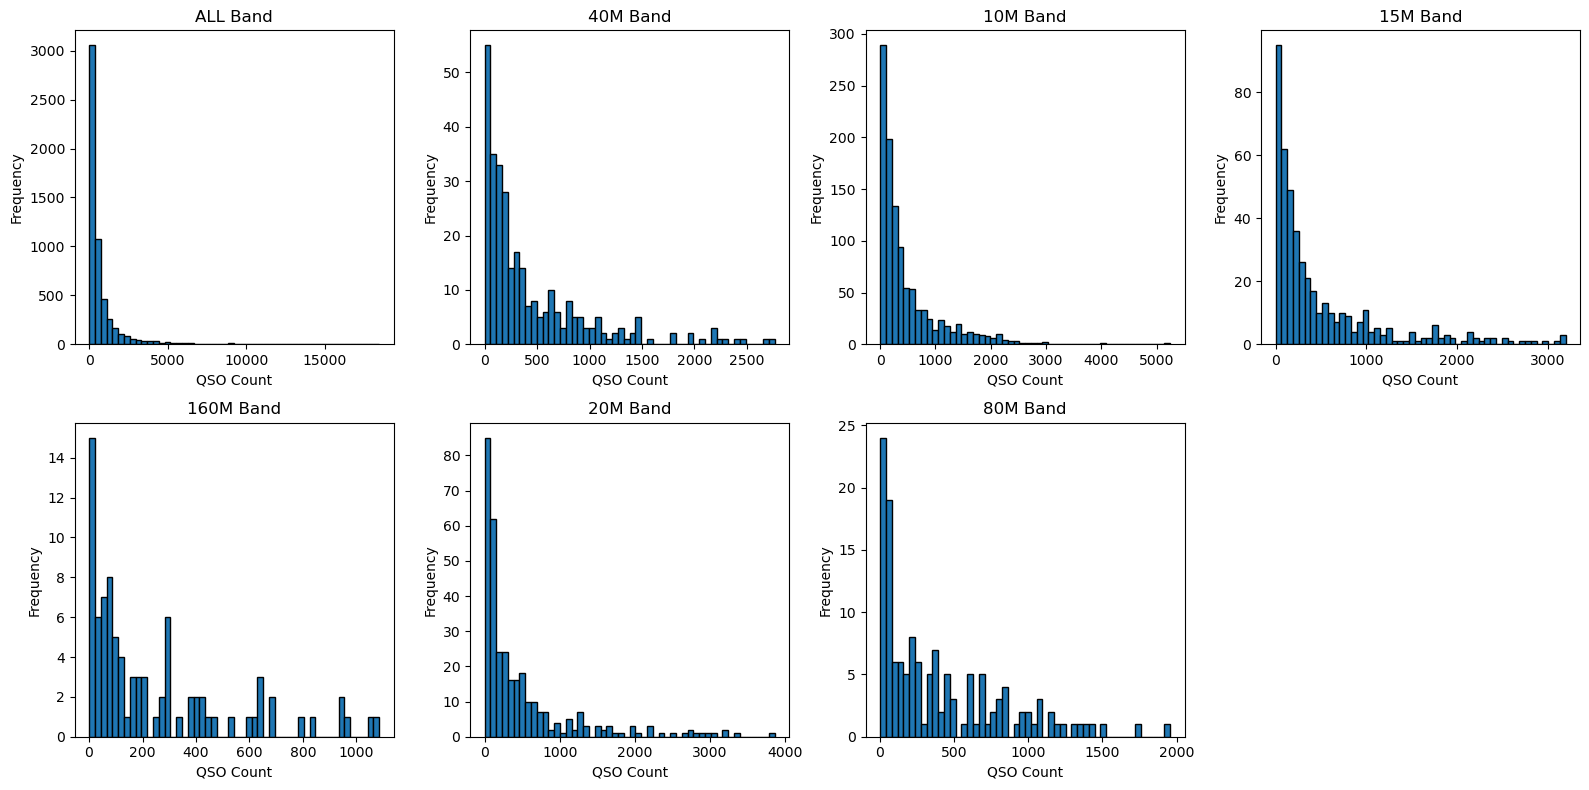

In [63]:
band_category = header_interest['CATEGORY-BAND'].unique()

# Set up the subplot grid 
n = len(band_category)
rows = 2
cols = (n + 1) // 2  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  

for i, band in enumerate(band_category):
    band_data = header_interest[header_interest['CATEGORY-BAND'] == band]
    
    # Plot the histogram
    axes[i].hist(band_data['QSO_COUNT'], edgecolor='black', bins = 50)
    axes[i].set_title(f'{band} Band')
    axes[i].set_xlabel('QSO Count')
    axes[i].set_ylabel('Frequency')

# Hide unused subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Category - Power

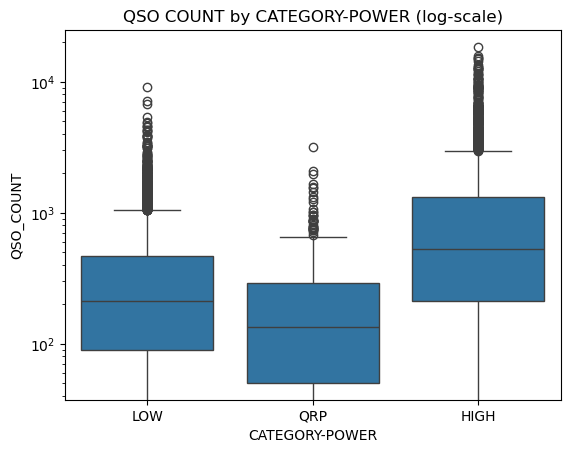

In [45]:
# box plot

sns.boxplot(data = header_interest, x = 'CATEGORY-POWER', y = 'QSO_COUNT')
plt.yscale('log')
plt.title("QSO COUNT by CATEGORY-POWER (log-scale)")
plt.show()

In [ ]:
power_categories = header_interest['CATEGORY-POWER'].unique()

fig, axes = plt.subplots(1, 3, figsize = (15, 4))
axes = axes.flatten()  

for i, power in enumerate(power_categories):
    power_data = header_interest[header_interest['CATEGORY-POWER'] == power]
    
    axes[i].hist(power_data['QSO_COUNT'], bins = 50, edgecolor = 'black')
    axes[i].set_title(f'{power}')
    axes[i].set_xlabel('QSO Count')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
    

### Category - Assisted

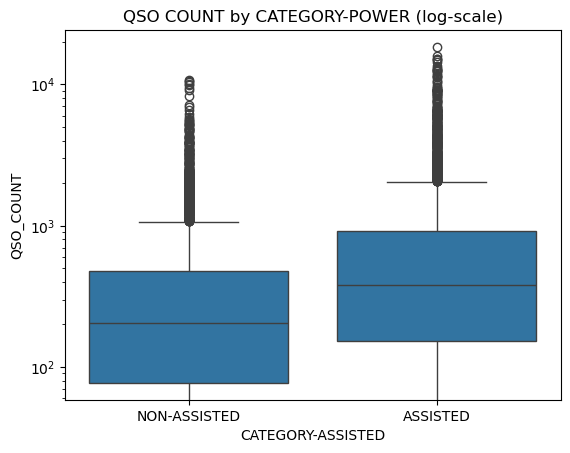

In [ ]:
# Bar plot

sns.boxplot(data = header_interest, x = 'CATEGORY-ASSISTED', y = 'QSO_COUNT')
plt.yscale('log')
plt.title("QSO COUNT by CATEGORY-ASSISTED (log-scale)")
plt.show()

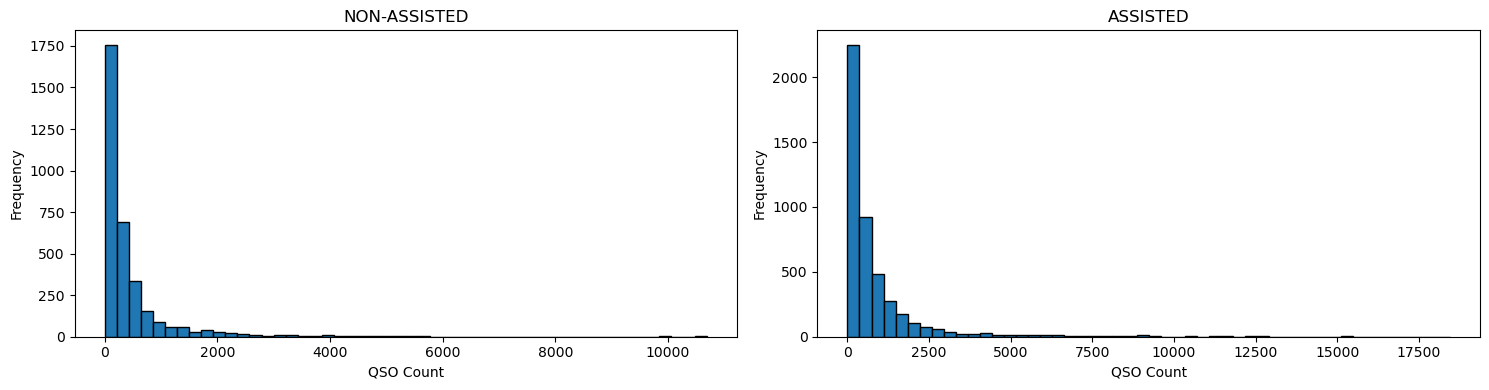

In [74]:
assisted_categories = header_interest['CATEGORY-ASSISTED'].unique()

fig, axes = plt.subplots(1, 2, figsize = (15, 4))
axes = axes.flatten()  

for i, assist in enumerate(assisted_categories):
    assist_data = header_interest[header_interest['CATEGORY-ASSISTED'] == assist]
    
    axes[i].hist(assist_data['QSO_COUNT'], bins = 50, edgecolor = 'black')
    axes[i].set_title(f'{assist}')
    axes[i].set_xlabel('QSO Count')
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()
    

### Category Transmitter

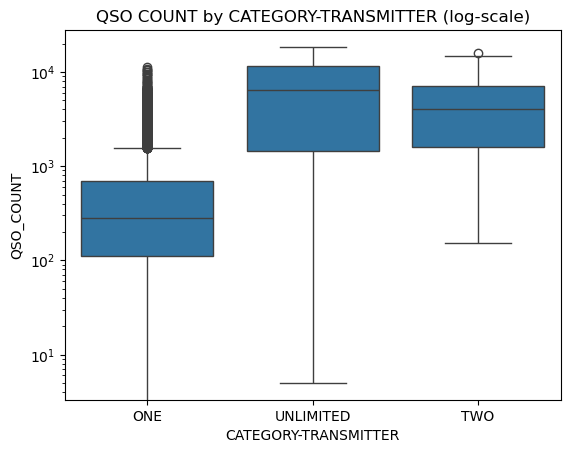

In [83]:
# Boxplot

sns.boxplot(data = header_interest, x = 'CATEGORY-TRANSMITTER', y = 'QSO_COUNT')
plt.yscale('log')
plt.title("QSO COUNT by CATEGORY-TRANSMITTER (log-scale)")
plt.show()

### Category Operator

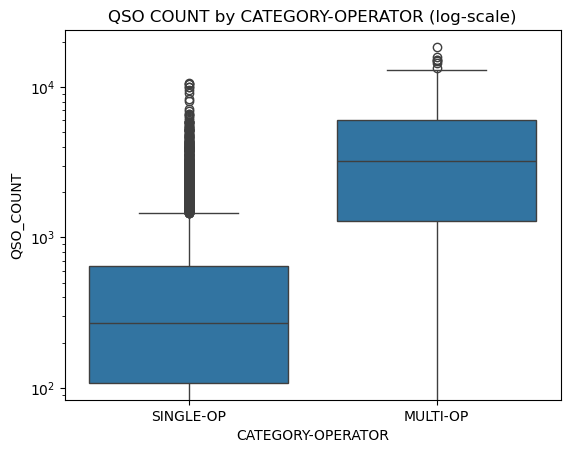

In [84]:
# boxplot

sns.boxplot(data = header_interest, x = 'CATEGORY-OPERATOR', y = 'QSO_COUNT')
plt.yscale('log')
plt.title("QSO COUNT by CATEGORY-OPERATOR (log-scale)")
plt.show()

### Location

Geographic location of contestants using maidenhead grid locator - 

['IO80EM', 'JO01FQ', 'JO01OC', 'IO81VV', 'IO81VV', 'LG89RR', 'LG89UV', 'MH10QG', 'RH82RH', 'RH87MM', 'JM54IQ', 'OK30CW', 'JO72OX', 'DL90TP', 'PK04NO', 'PK04NP', 'PK04KU', 'PK04JU', 'PK04JU', 'LN50AM', 'LN21JR', 'LN21', 'LN22OA', 'LN12IG', 'LN21IR', 'JN92GL', 'NJ07BD', 'JN88EF', 'JN36BF', 'FN30AR', 'FM18LV', 'KM72LH', 'KM72KD', 'KM72JB', nan, 'KM72MS', 'KM72KG', 'KM72MS', 'KM72KE', 'KM71JX', nan, 'KM71HH', 'KM72MS', 'KM72JA', 'KM71GP', 'KM72MU', 'KM72KI', 'KM64HV', 'AH46CC', 'KJ60HD', 'PM37MO', 'FK08TG', 'OI33KS', 'OI33JT', 'OI52KW', 'OI71QL', 'OI33NP', 'OI62AE', nan, nan, 'PM95UG', nan, nan, 'PM95', nan, nan, nan, 'PM95SP', 'PM95OH', 'PM95VQ', 'PM95', nan, 'QM06HN', 'PM95XV', nan, 'PM95pp', 'PM95MO', 'PM95sp', nan, nan, 'PM95QX', nan, nan, 'JO65MN', 'JO67QS', 'PM95RQ', 'PM64XL', 'QM08KG', nan, 'MJ64ML', 'GJ06', 'JO99GD', 'JN85AO', 'JN95FQ', 'JN85BP', 'JN85AU', 'JN65TH', 'JN85OJ', 'JN75XT', 'JN85AT', 'JN95GM', 'JN75EI', 'JN85EI', 'JN95BF', 'JN95KG', 'JN65', 'JN75RP', 'JN75EI', 'JN86', '

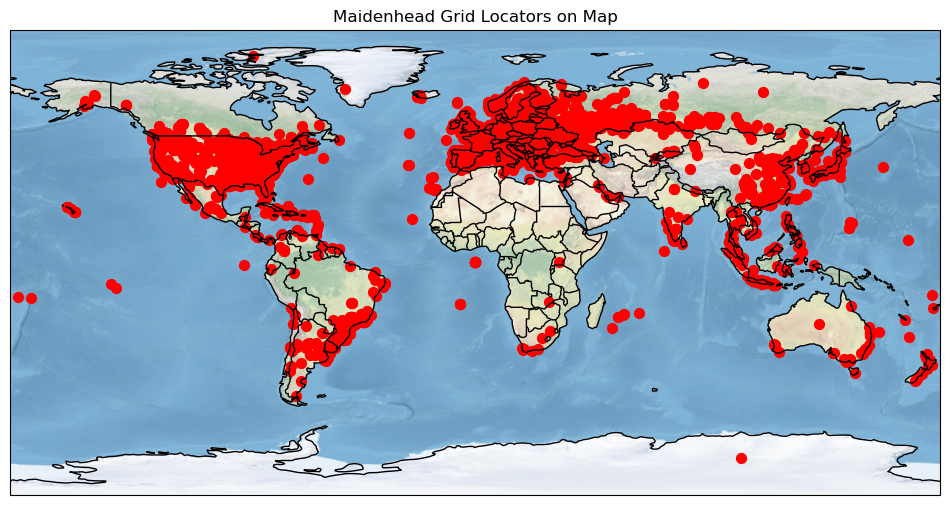

In [ ]:
n= len(header_interest)

maidenhead_grid_locators = []

for i in range(n):
    maidenhead_grid_locators.append(header_updated['GRID-LOCATOR'][i])

print(maidenhead_grid_locators)

lat, lon = mh.to_location(maidenhead_grid_locators[0], center= True)
print(lat, lon)

lst1 = []
lst2 = []
for locator in maidenhead_grid_locators:
    #if pd.isna(locator):
        #print("Null locator")
        #donkey = 5 # just ignore 
    if pd.isna(locator) != True:
        lat ,lon = mh.to_location(locator, center= True)
        lst1.append(lat)
        lst2.append(lon)

coords = list(zip(lst1, lst2))
#print(coords)

# Now to plotting on map

# Create map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

# Plot points
ax.scatter(lst2, lst1, color='red', marker='o', s=50, transform=ccrs.PlateCarree())

maidenhead_grid_locators_clean = [x for x in maidenhead_grid_locators if pd.notna(x)]



plt.title("Maidenhead Grid Locators on Map")
plt.show()



# Heat map with QSO_count

## Outlier Analysis

In [85]:
# Outliers in QSO_counts


# Scatter Plot to identify Outliers

header_interest['RANK-QSO'] = header_interest['QSO_COUNT'].rank(method = "first", ascending = False).astype(int)

C:\Users\neela\AppData\Local\Temp\ipykernel_37780\3326304911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  header_interest['RANK-QSO'] = header_interest['QSO_COUNT'].rank(method = "first", ascending = False).astype(int)
